## Model Prediction of BTC-USD Price Using SBi-LSTM and SBi-GRU

In [1]:
from class_data_collection import load_csv
from class_data_visualization import line_matplotlib
from class_data_preprocessing import feature_selection
from class_data_preprocessing import normalization
from class_data_preprocessing import splitting
from class_data_preprocessing import supervised_learning

# lib manipulation data
import numpy as np
import pandas as pd

# lib deep learning
import tensorflow as tf

- config models

In [2]:
algorithms = "SBi-LSTM"   # fill the value with SBi-LSTM or SBi-GRU
models = "univariate"     # fill the value with univariate or multivariate

In [3]:
# set random seed
tf.random.set_seed(1234)

In [4]:
# set waktu komputasi
import time
start = time.time()

### 1. Data Acquisition

In [5]:
# load csv
dataset = load_csv("BTC-USD.csv")

In [6]:
# show dataset
print(dataset)

                    Open          High           Low         Close
Date                                                              
2015-01-01    320.434998    320.434998    314.002991    314.248993
2015-01-02    314.079010    315.838989    313.565002    315.032013
2015-01-03    314.846008    315.149994    281.082001    281.082001
2015-01-04    281.145996    287.230011    257.612000    264.195007
2015-01-05    265.084015    278.341003    265.084015    274.473999
...                  ...           ...           ...           ...
2024-04-26  64485.371094  64789.656250  63322.398438  63755.320313
2024-04-27  63750.988281  63898.363281  62424.718750  63419.140625
2024-04-28  63423.515625  64321.484375  62793.597656  63113.230469
2024-04-29  63106.363281  64174.878906  61795.457031  63841.121094
2024-04-30  63839.417969  64703.332031  59120.066406  60636.855469

[3408 rows x 4 columns]


### 2. Exploartion Data Analysis

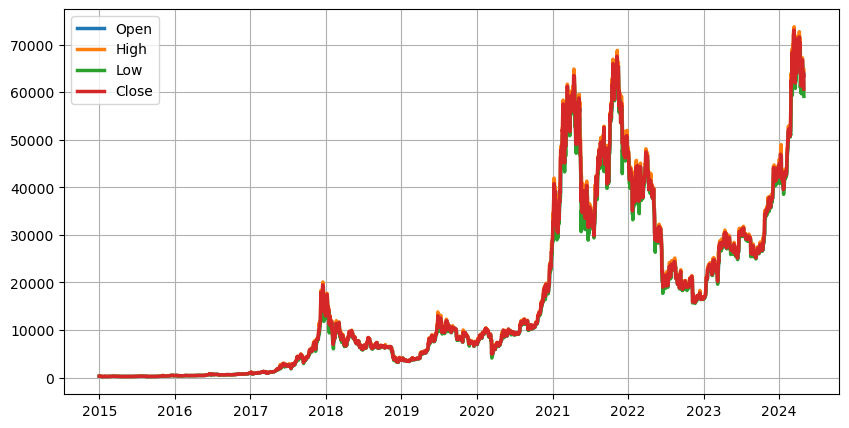

In [7]:
# show lineplot
line_matplotlib(dataset, ["Open", "High", "Low", "Close"])

### 3. Data Preprocessing

- feature selection

In [8]:
# only close price
if models == "univariate":
  data = feature_selection(dataset, ["Close"])

# if close price
if models == "multivariate":
  data = feature_selection(dataset, ["Open", "High", "Low", "Close"])

In [9]:
# show dataset after feature selection
np.round(data,4)

array([[  314.249 ],
       [  315.032 ],
       [  281.082 ],
       ...,
       [63113.2305],
       [63841.1211],
       [60636.8555]])

In [10]:
# show dimention
data.shape

(3408, 1)

- normalization min-max

In [11]:
# show dataset after normalization
scaled = normalization(data)
np.round(scaled,4)

array([[0.0019],
       [0.0019],
       [0.0014],
       ...,
       [0.8632],
       [0.8732],
       [0.8293]])

In [12]:
# show dimention
scaled.shape

(3408, 1)

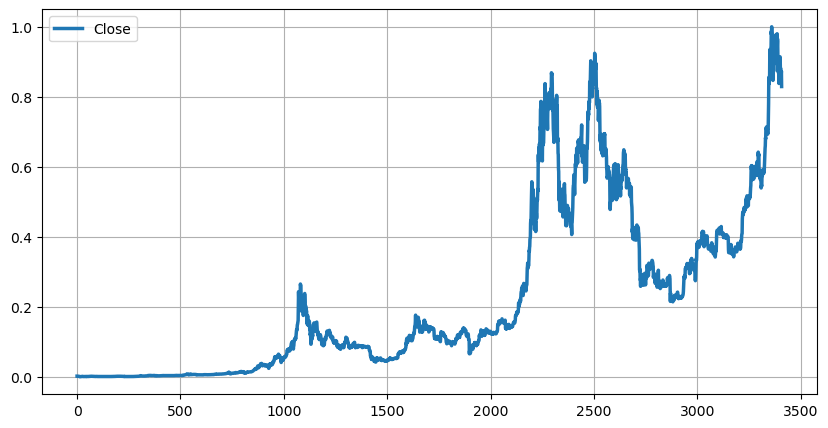

In [13]:
# only close price
if models == "univariate":
  line_matplotlib(
    pd.DataFrame(scaled, columns=["Close"]), ["Close"]
  )

# if close price
if models == "multivariate":
  line_matplotlib(
    pd.DataFrame(scaled, columns=["Open", "High", "Low", "Close"]),
    ["Open", "High", "Low", "Close"]
  )


- splitting data

In [14]:
# process splitting data
train_data, test_data = splitting(scaled, 0.8, 0.2)

In [15]:
print("Dimention of training data : " +str(train_data.shape))
print("Dimention of testing data : " +str(test_data.shape))

Dimention of training data : (2726, 1)
Dimention of testing data : (682, 1)


- Supervised Data

In [16]:
# process supervised learning
look_back = 60
x_train, y_train = supervised_learning(look_back, train_data)
x_test, y_test = supervised_learning(look_back, test_data)

In [17]:
# show dimention
print(x_train.shape, y_train.shape)

(2666, 60) (2666,)


In [18]:
# show dimention
print(x_test.shape, y_test.shape)

(622, 60) (622,)


In [19]:
# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [20]:
# show dimention
print(x_train.shape, x_test.shape)

(2666, 60, 1) (622, 60, 1)


### 4. Model Prediction of BTC-USD Price

In [21]:
# to be continued